Copyright (c) University of Strasbourg. All Rights Reserved.

# Deep Temporal Model for Surgical Phase Recognition
-------------------
**Learning from a tiny dataset of manual annotations: a teacher/student approach for surgical phase recognition (IPCAI 2019)**

_Tong Yu, Didier Mutter, Jacques Marescaux, Nicolas Padoy_

[![arXiv](https://img.shields.io/badge/arxiv-1812.00033-red)](https://arxiv.org/abs/1812.00033)

*This notebook provides a demo of surgical phase recognition using [TF-Cholec80](). Please make sure `tf_cholec80` is downloaded, and either installed or available in the notebook's workspace through other means.*

In [5]:
from process_video import phase_recognition_ds, phase_plot
from tf_cholec80.dataset import make_cholec80
import matplotlib.pyplot as plt

## Downloading the data

Model checkpoints:

In [ ]:
!wget --content-disposition https://s3.unistra.fr/camma_public/github/phase_recognition/videos.zip

Unzipping:

In [ ]:
!unzip checkpoints.zip

Phase lookup table:

In [7]:
PHASES = [
    "Preparation",
    "CalotTriangleDissection",
    "ClippingAndCutting",
    "GallbladderDissection",
    "GallbladderPackaging",
    "CleaningAndCoagulation",
    "GallbladderRetraction"
]

## Predicting phases

In [ ]:
ds = make_cholec80(
    12,
    video_ids=[33],
    mode="INFER"
)

it = ds.make_one_shot_iterator()
return_dict = it.get_next()

frames = return_dict["frame"]

In [ ]:
phases = phase_recognition_ds(frames)

## Visualizing the results

[Text(1, 0, 'Preparation'),
 Text(1, 0, 'CalotTriangleDissection'),
 Text(1, 0, 'ClippingAndCutting'),
 Text(1, 0, 'GallbladderDissection'),
 Text(1, 0, 'GallbladderPackaging'),
 Text(1, 0, 'CleaningAndCoagulation'),
 Text(1, 0, 'GallbladderRetraction')]

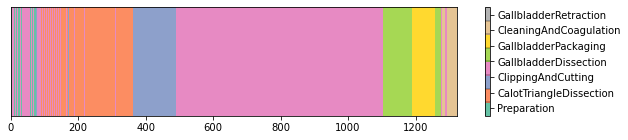

In [8]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.set_yticks([], [])
im = ax.pcolormesh(phases, cmap="Set2", vmin=1, vmax=8)
cbar = fig.colorbar(im, ticks=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], orientation="vertical", drawedges=True)
cbar.ax.set_yticklabels(PHASES)